### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import seaborn as sns

### Reading data from train.csv file

In [2]:
df=pd.read_csv("./archive/Train.csv")
a=df.iloc[:,-1]
print(a)

0        Train/20/00020_00000_00000.png
1        Train/20/00020_00000_00001.png
2        Train/20/00020_00000_00002.png
3        Train/20/00020_00000_00003.png
4        Train/20/00020_00000_00004.png
                      ...              
39204    Train/42/00042_00007_00025.png
39205    Train/42/00042_00007_00026.png
39206    Train/42/00042_00007_00027.png
39207    Train/42/00042_00007_00028.png
39208    Train/42/00042_00007_00029.png
Name: Path, Length: 39209, dtype: object


### Defining all classes in dataset

In [3]:
#Defining all classes in dataset
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

### Accessing meta files in dataset

In [4]:
d={}
meta="./archive/Meta"
add=os.listdir(meta)
add.remove(".~lock.ClassesInformation.ods#")
add.remove(".~lock.ClassesInformationStrong.ods#")
for i in add:
    x=i.split(".")
    im=Image.open(meta+'/'+i)
    im=im.convert("RGB")
    im_arr=np.array(im)
    d[int(x[0])]=im_arr


### Reading training data from train folder

In [5]:
x_data=[];y_data=[];new_size=(32,32)
ias=os.listdir("./archive/Train")
for i in ias:
    train_img=os.listdir("./archive/Train"+"/"+i)
    for j in train_img:
        img1=Image.open("./archive/Train"+"/"+i+"/"+j)
        img1=img1.resize(new_size)
        a1=img1.convert("RGB")
        x_data.append(np.array(a1)) 
        y_data.append(int(i))

### Converting data to numpy array

In [7]:
x_data=np.array(x_data)
y_data=np.array(y_data)

In [8]:
print(x_data.shape,y_data.shape)

(39209, 32, 32, 3) (39209,)


### Plotting no of samples in each class in sorted order

In [ ]:
#yet to complete

### Reading test data

In [9]:
df_test=pd.read_csv("./archive/Test.csv")

In [10]:
x1_test=[];y1_test=[]
for i in range(df_test.shape[0]):
    img_test=Image.open("./archive"+"/"+df_test.iloc[i,-1])
    img_test=img_test.resize(new_size)
    img_test=img_test.convert("RGB")
    x1_test.append(np.array(img_test))  
    y1_test.append(df_test.iloc[i,6])

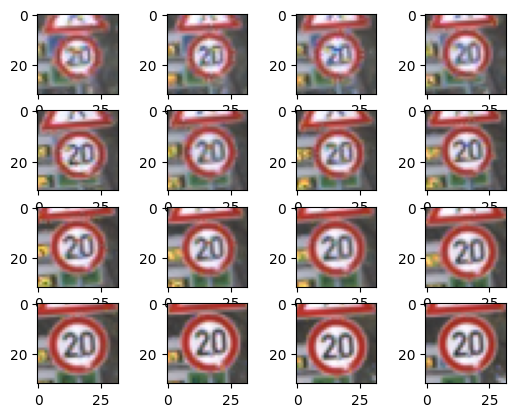

In [11]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_data[i])

### Split the data set

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,shuffle=True)
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [13]:
import tensorflow as tf
import keras as k
from keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout
from keras.models import Sequential

## Model

In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,1),activation='relu',padding="same"))
model.add(Conv2D(64,(3,3),activation='relu',padding="same"))
model.add(Dropout(0.3))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding="same"))
model.add(Conv2D(64,(3,3),activation='relu',padding="same"))
model.add(Dropout(0.3))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units=43,activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        1

In [16]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [17]:
hist=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
785/785 [==============================] - 276s 346ms/step - loss: 3.2735 - accuracy: 0.3982 - val_loss: 2.9705 - val_accuracy: 0.4696
Epoch 2/10
785/785 [==============================] - 257s 327ms/step - loss: 2.0852 - accuracy: 0.7160 - val_loss: 5.2523 - val_accuracy: 0.6661
Epoch 3/10
785/785 [==============================] - 249s 317ms/step - loss: 2.4063 - accuracy: 0.8310 - val_loss: 3.5511 - val_accuracy: 0.8430
Epoch 4/10
785/785 [==============================] - 247s 314ms/step - loss: 2.9478 - accuracy: 0.8903 - val_loss: 5.2443 - val_accuracy: 0.8634
Epoch 5/10
785/785 [==============================] - 251s 320ms/step - loss: 2.4198 - accuracy: 0.9292 - val_loss: 2.8485 - val_accuracy: 0.8996
Epoch 6/10
785/785 [==============================] - 249s 317ms/step - loss: 2.7841 - accuracy: 0.9426 - val_loss: 5.7465 - val_accuracy: 0.8989
Epoch 7/10
785/785 [==============================] - 257s 328ms/step - loss: 3.1096 - accuracy: 0.9503 - val_loss: 3.1824 -

###  Train and validation accuracy wrt epochs

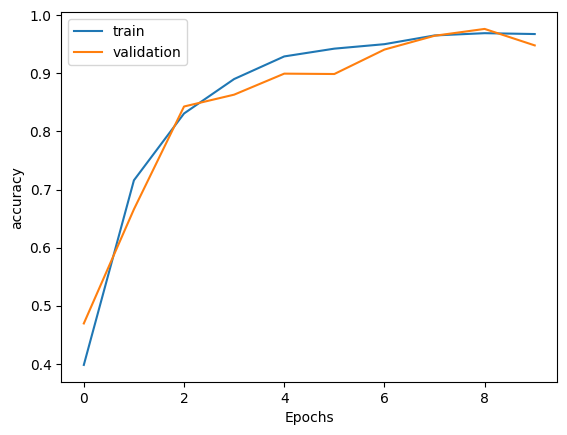

In [18]:
plt.plot(hist.history["accuracy"],label="train")
plt.plot(hist.history["val_accuracy"],label="validation")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.legend()

### Train and validation accuracy wrt epochs

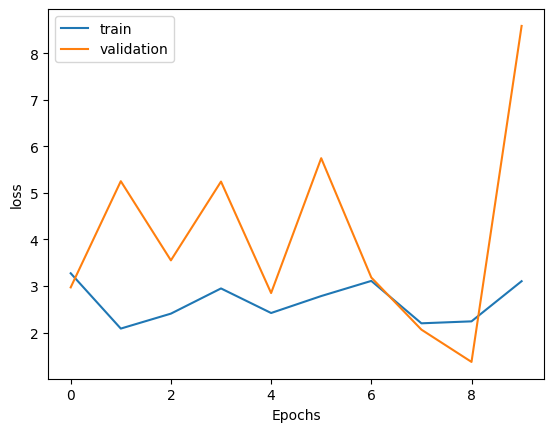

In [19]:
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],label="validation")
plt.ylabel('loss')
plt.xlabel("Epochs")
plt.legend()

In [22]:
model.evaluate(x_test,y_test)

246/246 [==============================] - 19s 75ms/step - loss: 9.9614 - accuracy: 0.9413


[9.96141242980957, 0.9413415193557739]

In [23]:
model.save('TSRS_model.h5')

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
model.save_weights("TSRS_weights.h5")